In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os

In [3]:
#ALL FILES IN DIRECTORY

directory_path = r"C:\Users\sidiq\OneDrive\Desktop\HOSPITALITY\DATA"

files = [file for file in os.listdir(directory_path)]

for file in files:
    print(file)

dim_date.csv
dim_hotels.csv
dim_rooms.csv
fact_aggregated_bookings.csv
fact_bookings.csv
meta_data_hospitality.txt
metrics list.xlsx


In [4]:
# Create DataFrames for CSV files
csv_files = [file for file in files if file.endswith(".csv")]

for csv_file in csv_files:
    file_path = os.path.join(directory_path, csv_file)
    name = os.path.splitext(csv_file)[0]  # Use file name as DataFrame name
    globals()[name] = pd.read_csv(file_path)
    print(f"{name} DataFrame created.")

dim_date DataFrame created.
dim_hotels DataFrame created.
dim_rooms DataFrame created.
fact_aggregated_bookings DataFrame created.
fact_bookings DataFrame created.


In [5]:
# Rename dataframe 
hotels = dim_hotels
rooms = dim_rooms
date = dim_date
df_1 = fact_aggregated_bookings
df_2 = fact_bookings

In [6]:
hotels

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi
5,16563,Atliq Palace,Business,Delhi
6,17558,Atliq Grands,Luxury,Mumbai
7,17559,Atliq Exotica,Luxury,Mumbai
8,17560,Atliq City,Business,Mumbai
9,17561,Atliq Blu,Luxury,Mumbai


In [7]:
rooms

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


In [8]:
df_1

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,01-May-22,RT1,25,30
1,19562,01-May-22,RT1,28,30
2,19563,01-May-22,RT1,23,30
3,17558,01-May-22,RT1,13,19
4,16558,01-May-22,RT1,18,19
...,...,...,...,...,...
9195,16563,31-Jul-22,RT4,13,18
9196,16559,31-Jul-22,RT4,13,18
9197,17558,31-Jul-22,RT4,3,6
9198,19563,31-Jul-22,RT4,3,6


In [9]:
df_2

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,2022-04-27,2022-05-01,2022-05-02,3,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,2022-04-30,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,2022-04-28,2022-05-01,2022-05-04,2,RT1,logtrip,5.0,Checked Out,9100,9100
3,May012216558RT14,16558,2022-04-28,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,2022-04-27,2022-05-01,2022-05-02,4,RT1,direct online,5.0,Checked Out,10920,10920
...,...,...,...,...,...,...,...,...,...,...,...,...
134585,Jul312217564RT46,17564,2022-07-29,2022-07-31,2022-08-03,1,RT4,makeyourtrip,2.0,Checked Out,32300,32300
134586,Jul312217564RT47,17564,2022-07-30,2022-07-31,2022-08-01,4,RT4,logtrip,2.0,Checked Out,38760,38760
134587,Jul312217564RT48,17564,2022-07-30,2022-07-31,2022-08-02,1,RT4,tripster,NaN,Cancelled,32300,12920
134588,Jul312217564RT49,17564,2022-07-29,2022-07-31,2022-08-01,2,RT4,logtrip,2.0,Checked Out,32300,32300


In [10]:
df_2.isnull().any()

booking_id           False
property_id          False
booking_date         False
check_in_date        False
checkout_date        False
no_guests            False
room_category        False
booking_platform     False
ratings_given         True
booking_status       False
revenue_generated    False
revenue_realized     False
dtype: bool

In [11]:
# Let us make some changes the dataframe date

In [12]:
# Convert date fromat in the datarame date

date['date'] = pd.to_datetime(date['date'], format='%d-%b-%y')

# Convert the 'date' column to the desired format
date['date'] = date['date'].dt.strftime('%Y-%m-%d')

In [13]:
# Let us make some changes in df_1 dataframe

In [14]:
# Convert date fromat in the datarame df_1

df_1['check_in_date'] = pd.to_datetime(df_1['check_in_date'] , format='%d-%b-%y')

# Convert the 'date' column to the desired format
df_1['check_in_date']  = df_1['check_in_date'] .dt.strftime('%Y-%m-%d')


In [15]:
# Add coloumns to df_1 dataframe.

In [16]:
# Now add the column week no and day_type column from the dataframe date to the dataframes df_1 and df_2.
# This is done using merge

# Merge based on 'date' and 'check_in_date'
df_1 = pd.merge(df_1, date, how='left', left_on='check_in_date', right_on='date')
df_1.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,date,mmm yy,week no,day_type
0,16559,2022-05-01,RT1,25,30,2022-05-01,May 22,W 19,weekend
1,19562,2022-05-01,RT1,28,30,2022-05-01,May 22,W 19,weekend
2,19563,2022-05-01,RT1,23,30,2022-05-01,May 22,W 19,weekend
3,17558,2022-05-01,RT1,13,19,2022-05-01,May 22,W 19,weekend
4,16558,2022-05-01,RT1,18,19,2022-05-01,May 22,W 19,weekend


In [17]:
# Let us drop 1 date and mm yy coloumns from above
df_1 = df_1.drop(columns = ['date','mmm yy'])
df_1.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity,week no,day_type
0,16559,2022-05-01,RT1,25,30,W 19,weekend
1,19562,2022-05-01,RT1,28,30,W 19,weekend
2,19563,2022-05-01,RT1,23,30,W 19,weekend


In [18]:
# Now add hotel catogory and city from the dataframe hotel to the dataframe df_1

In [19]:
df_1 = pd.merge(df_1, hotels, how='left', left_on='property_id', right_on='property_id')
df_1.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity,week no,day_type,property_name,category,city
0,16559,2022-05-01,RT1,25,30,W 19,weekend,Atliq Exotica,Luxury,Mumbai
1,19562,2022-05-01,RT1,28,30,W 19,weekend,Atliq Bay,Luxury,Bangalore
2,19563,2022-05-01,RT1,23,30,W 19,weekend,Atliq Palace,Business,Bangalore


In [20]:
# Add coloumns to df_2 dataframe.

In [21]:
# Merge based on 'date' and 'check_in_date'
df_2 = pd.merge(df_2, date, how='left', left_on='check_in_date', right_on='date')

# remove date and mmm yy coloumns
df_2 = df_2.drop(columns = ['date','mmm yy'])
df_2.head(3)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,week no,day_type
0,May012216558RT11,16558,2022-04-27,2022-05-01,2022-05-02,3,RT1,direct online,1.0,Checked Out,10010,10010,W 19,weekend
1,May012216558RT12,16558,2022-04-30,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640,W 19,weekend
2,May012216558RT13,16558,2022-04-28,2022-05-01,2022-05-04,2,RT1,logtrip,5.0,Checked Out,9100,9100,W 19,weekend


In [22]:
df_2.tail()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,week no,day_type
134585,Jul312217564RT46,17564,2022-07-29,2022-07-31,2022-08-03,1,RT4,makeyourtrip,2.0,Checked Out,32300,32300,W 32,weekend
134586,Jul312217564RT47,17564,2022-07-30,2022-07-31,2022-08-01,4,RT4,logtrip,2.0,Checked Out,38760,38760,W 32,weekend
134587,Jul312217564RT48,17564,2022-07-30,2022-07-31,2022-08-02,1,RT4,tripster,NaN,Cancelled,32300,12920,W 32,weekend
134588,Jul312217564RT49,17564,2022-07-29,2022-07-31,2022-08-01,2,RT4,logtrip,2.0,Checked Out,32300,32300,W 32,weekend
134589,Jul312217564RT410,17564,2022-07-31,2022-07-31,2022-08-01,2,RT4,makeyourtrip,NaN,Cancelled,32300,12920,W 32,weekend


In [23]:
# Now add hotel catogory and city from the dataframe hotel

In [24]:
df_2 = pd.merge(df_2, hotels, how='left', left_on='property_id', right_on='property_id')
df_2.head(3)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,week no,day_type,property_name,category,city
0,May012216558RT11,16558,2022-04-27,2022-05-01,2022-05-02,3,RT1,direct online,1.0,Checked Out,10010,10010,W 19,weekend,Atliq Grands,Luxury,Delhi
1,May012216558RT12,16558,2022-04-30,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640,W 19,weekend,Atliq Grands,Luxury,Delhi
2,May012216558RT13,16558,2022-04-28,2022-05-01,2022-05-04,2,RT1,logtrip,5.0,Checked Out,9100,9100,W 19,weekend,Atliq Grands,Luxury,Delhi


In [25]:
# TOTAL REVENUE (GENERATED AND REALIZED)
    # From each city
    # From each property
    # From each room catagory

#### ANAYSIS : TOTAL REVENUE FROM EACH CITY 

In [26]:
## Total revenue from each city
# df_2 ----> groupby(city) ----> sum revenue

In [27]:
city_rev_gen_total = df_2.groupby('city')['revenue_generated'].sum().reset_index()
city_rev_gen_total

,city,revenue_generated
0,Bangalore,494828175
1,Delhi,346451840
2,Hyderabad,381400850
3,Mumbai,784865350


In [29]:
city_rev_real_total = df_2.groupby('city')['revenue_realized'].sum().reset_index()
city_rev_real_total

,city,revenue_realized
0,Bangalore,420397050
1,Delhi,294500318
2,Hyderabad,325232870
3,Mumbai,668640991


In [31]:
city_rev_dif_total = df_2.groupby('city')['revenue_generated'].sum() - df_2.groupby('city')['revenue_realized'].sum()
city_rev_dif_total

city
Bangalore     74431125
Delhi         51951522
Hyderabad     56167980
Mumbai       116224359
dtype: int64

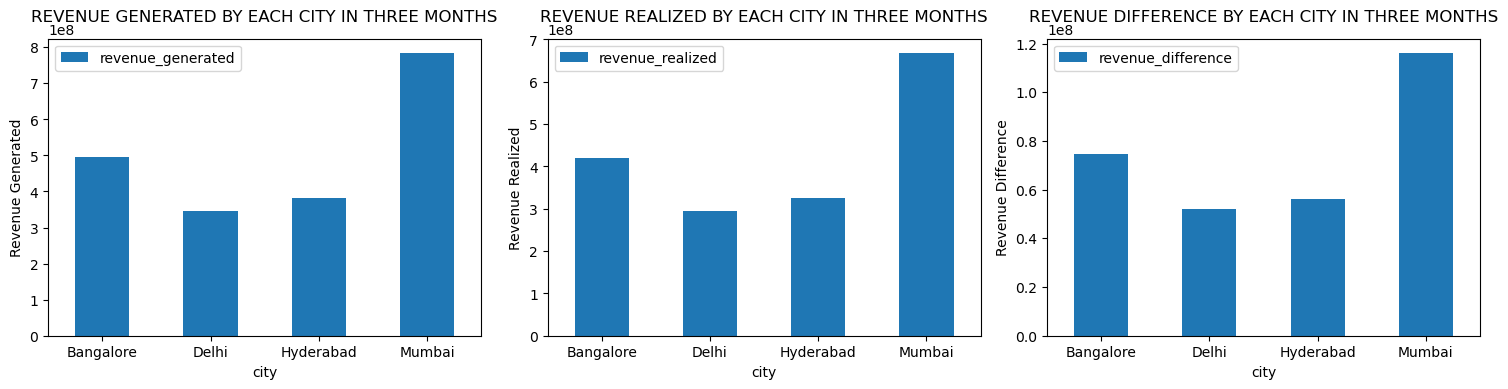

In [39]:
# All three values plots in a single figure
city_rev_gen_total = df_2.groupby('city')['revenue_generated'].sum().reset_index()
city_rev_real_total = df_2.groupby('city')['revenue_realized'].sum().reset_index()
city_rev_dif_total = city_rev_gen_total['revenue_generated'] - city_rev_real_total['revenue_realized']

# Merge the two DataFrames on the 'city' column
merged_df = pd.merge(city_rev_gen_total, city_rev_real_total, on='city', suffixes=('_gen', '_real'))

# Create a figure with three subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))

# Plot the first bar chart
merged_df.plot.bar(x='city', y='revenue_generated', rot=0, ax=axes[0])
axes[0].set_ylabel('Revenue Generated')
axes[0].set_title('REVENUE GENERATED BY EACH CITY IN THREE MONTHS',y= 1.03)

# Plot the second bar chart
merged_df.plot.bar(x='city', y='revenue_realized', rot=0, ax=axes[1])
axes[1].set_ylabel('Revenue Realized')
axes[1].set_title('REVENUE REALIZED BY EACH CITY IN THREE MONTHS',y= 1.03)

# Plot the third bar chart
merged_df['revenue_difference'] = merged_df['revenue_generated'] - merged_df['revenue_realized']
merged_df.plot.bar(x='city', y='revenue_difference', rot=0, ax=axes[2])
axes[2].set_ylabel('Revenue Difference')
axes[2].set_title('REVENUE DIFFERENCE BY EACH CITY IN THREE MONTHS', y= 1.03)

# Adjust layout
plt.tight_layout()
plt.show()


In [37]:
# Let us check proportion of revenue realized. 
# We will calculate the percentage of revenue realized with respect to the revenue generated
# (rev_real / rev_gen)*100
merged_df['real/gen in per'] = (merged_df['revenue_realized']/merged_df['revenue_generated'])*100

In [38]:
merged_df

,city,revenue_generated,revenue_realized,revenue_difference,real/gen in per
0,Bangalore,494828175,420397050,74431125,84.958188
1,Delhi,346451840,294500318,51951522,85.004692
2,Hyderabad,381400850,325232870,56167980,85.273242
3,Mumbai,784865350,668640991,116224359,85.191809


#### RESULT 

Mumbai generated highest revenue followed by Banglore, Hyderabad, Delhi.

###### Highest Revenue City:

Revenue realized in Mumbai is  of 668,640,991.

###### Lowest Revenue City:

Revenue realized in Delhi is 294,500,318.

###### Consistency in Percentage of Revenue Realized:

Across all cities (Bangalore, Delhi, Hyderabad, Mumbai), the percentage of revenue realized with respect to revenue generated is consistently around 85%. This suggests a common trend of achieving approximately 85% realization of the generated revenue.

#### SUGGETIONS
The 85% benchmark can serve as a reference for evaluating future performance. Cities with percentages below this benchmark may need attention to enhance their revenue realization processes.

Analyzing the factors contributing to the 15% difference between generated and realized revenue could uncover opportunities for optimization.

#### TOTAL REVENUE FROM EACH PROPERTY

In [33]:
## Total revenue from each property
# df_2 ----> groupby(proeprty) ----> sum revenue

In [34]:
# Revenue Generated by each property in three months
df_2.groupby('property_id')['revenue_generated'].sum()

property_id
16558     42251720
16559    138698580
16560     64138200
16561     68568430
16562     66292870
16563    105200620
17558     88430770
17559    109696920
17560    103776330
17561     86646790
17562     61333960
17563    118616735
17564     77665265
18558     54289300
18559     56049500
18560     71246500
18561     65615250
18562     81067000
18563     53133300
19558     63782025
19559     70266225
19560     97486125
19561     85807575
19562     96540375
19563     80945850
Name: revenue_generated, dtype: int64

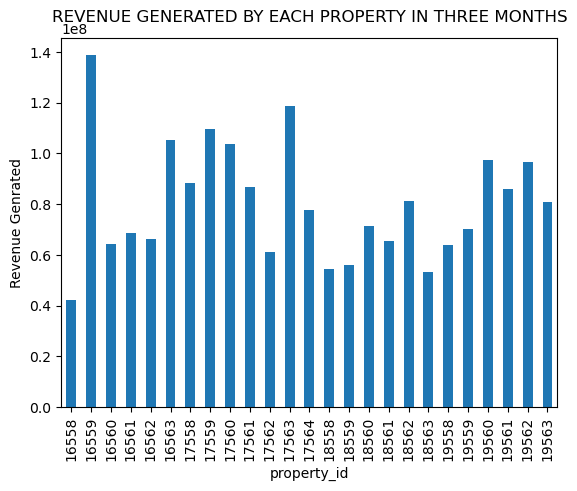

In [35]:
df_2.groupby('property_id')['revenue_generated'].sum().plot(kind='bar')
plt.ylabel("Revenue Genrated")
plt.title("REVENUE GENERATED BY EACH PROPERTY IN THREE MONTHS", y= 1.02)
plt.show()

In [36]:
# Let us plot same information considering cities also
city_prop = df_2.groupby(['property_id','city'])['revenue_generated'].sum().reset_index()
city_prop

,property_id,city,revenue_generated
0,16558,Delhi,42251720
1,16559,Mumbai,138698580
2,16560,Delhi,64138200
3,16561,Delhi,68568430
4,16562,Delhi,66292870
5,16563,Delhi,105200620
6,17558,Mumbai,88430770
7,17559,Mumbai,109696920
8,17560,Mumbai,103776330
9,17561,Mumbai,86646790


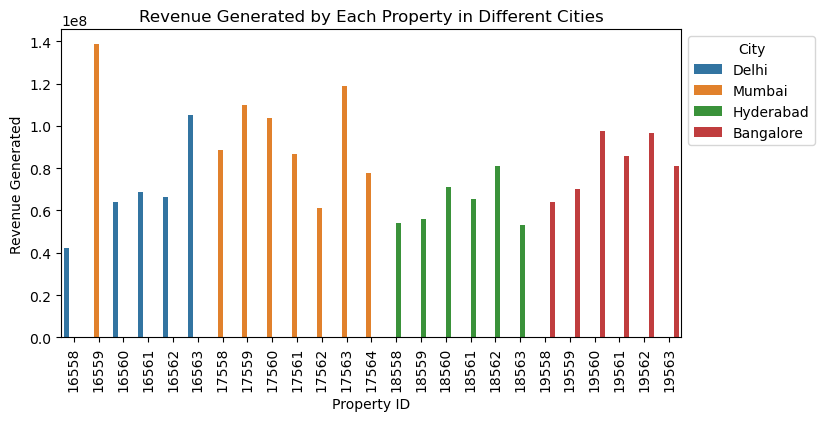

In [37]:
# Plot 
#sns.set(style="whitegrid")

plt.figure(figsize=(8,4))
sns.barplot(x='property_id', y='revenue_generated', hue='city', data=city_prop)

plt.xlabel('Property ID')
plt.ylabel('Revenue Generated')
plt.title('Revenue Generated by Each Property in Different Cities')

plt.legend(title='City', bbox_to_anchor=(1, 1))

plt.xticks(rotation='vertical')

plt.show()

In [38]:
# Revenue realized by each property in three months
df_2.groupby('property_id')['revenue_realized'].sum()

property_id
16558     36061172
16559    118448418
16560     54932178
16561     57933400
16562     56437570
16563     89135998
17558     74730742
17559     93996570
17560     87996216
17561     73918312
17562     51914158
17563    101511080
17564     66125495
18558     46246510
18559     47844020
18560     61007200
18561     56040450
18562     69255910
18563     44838780
19558     54494340
19559     60023460
19560     81876345
19561     72963360
19562     82443540
19563     68596005
Name: revenue_realized, dtype: int64

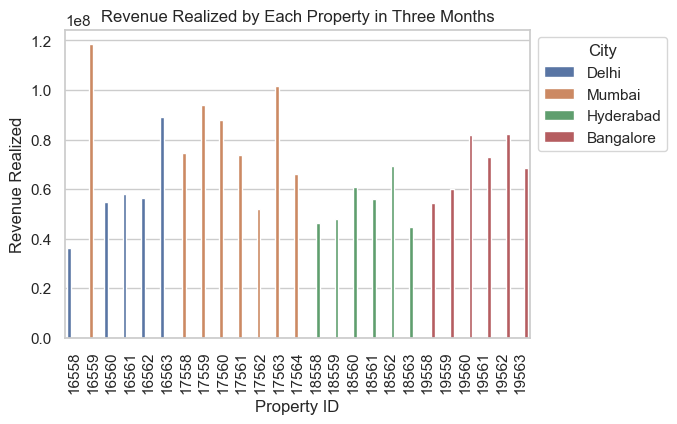

In [90]:
sns.set(style="whitegrid")

# Group by both 'property_id' and 'city' and sum the revenue
grouped_data = df_2.groupby(['property_id', 'city'])['revenue_realized'].sum().reset_index()

# Create a bar plot
plt.figure(figsize=(6, 4))
sns.barplot(x='property_id', y='revenue_realized', hue='city', data=grouped_data , dodge=True, width = 0.8)

# Set labels and title
plt.xlabel('Property ID')
plt.ylabel('Revenue Realized')
plt.title('Revenue Realized by Each Property in Three Months')

# Show the legend
plt.legend(title='City', bbox_to_anchor=(1, 1))

plt.xticks(rotation='vertical')

# Show the plot
plt.show()

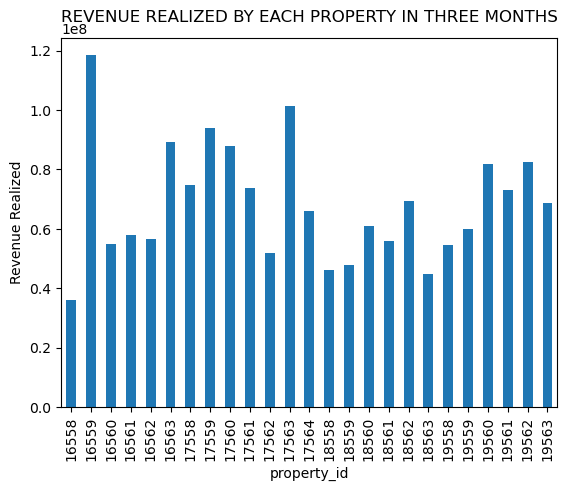

In [76]:
df_2.groupby('property_id')['revenue_realized'].sum().plot(kind='bar')
plt.ylabel("Revenue Realized")
plt.title("REVENUE REALIZED BY EACH PROPERTY IN THREE MONTHS", y= 1.02)
plt.show()

In [40]:
# Revenue difference by each property in three months
df_2.groupby('property_id')['revenue_generated'].sum()-df_2.groupby('property_id')['revenue_realized'].sum()

property_id
16558     6190548
16559    20250162
16560     9206022
16561    10635030
16562     9855300
16563    16064622
17558    13700028
17559    15700350
17560    15780114
17561    12728478
17562     9419802
17563    17105655
17564    11539770
18558     8042790
18559     8205480
18560    10239300
18561     9574800
18562    11811090
18563     8294520
19558     9287685
19559    10242765
19560    15609780
19561    12844215
19562    14096835
19563    12349845
dtype: int64

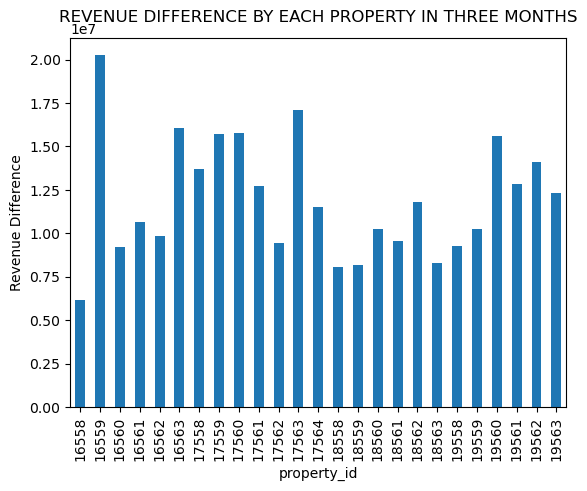

In [41]:
(df_2.groupby('property_id')['revenue_generated'].sum()-df_2.groupby('property_id')['revenue_realized'].sum()).plot(kind='bar')
plt.ylabel("Revenue Difference")
plt.title("REVENUE DIFFERENCE BY EACH PROPERTY IN THREE MONTHS", y= 1.02)
plt.show()

In [41]:
# Let us check proportion of revenue realized of each property.
# We will calculate the percentage of revenue realized with respect to the revenue generated
# (rev_real / rev_gen)*100 
(df_2.groupby('property_id')['revenue_realized'].sum()/df_2.groupby('property_id')['revenue_generated'].sum())*100

property_id
16558    85.348412
16559    85.399878
16560    85.646585
16561    84.489903
16562    85.133695
16563    84.729537
17558    84.507623
17559    85.687520
17560    84.794111
17561    85.309926
17562    84.641784
17563    85.579054
17564    85.141659
18558    85.185313
18559    85.360298
18560    85.628347
18561    85.407661
18562    85.430459
18563    84.389225
19558    85.438397
19559    85.422918
19560    83.987691
19561    85.031374
19562    85.397990
19563    84.743078
dtype: float64

In [42]:
# mean value of percentageof revenue realized with respect to revenue generated
((df_2.groupby('property_id')['revenue_realized'].sum()/df_2.groupby('property_id')['revenue_generated'].sum())*100).mean()

85.11329744954357

In [46]:
rev_per = (df_2.groupby('property_id')['revenue_realized'].sum()/df_2.groupby('property_id')['revenue_generated'].sum())*100

In [48]:
# properties with low revenue realized compared to revenue generated
rev_per[rev_per < 85]

property_id
16561    84.489903
16563    84.729537
17558    84.507623
17560    84.794111
17562    84.641784
18563    84.389225
19560    83.987691
19563    84.743078
dtype: float64

#### RESULT

In [42]:
## Revenue From Each Room For Three Months

In [43]:
# df_2 ----> groupby(room catagory) ---->sum (revenue) 

In [44]:
df_2.head(3)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,week no,day_type,property_name,category,city
0,May012216558RT11,16558,2022-04-27,2022-05-01,2022-05-02,3,RT1,direct online,1.0,Checked Out,10010,10010,W 19,weekend,Atliq Grands,Luxury,Delhi
1,May012216558RT12,16558,2022-04-30,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640,W 19,weekend,Atliq Grands,Luxury,Delhi
2,May012216558RT13,16558,2022-04-28,2022-05-01,2022-05-04,2,RT1,logtrip,5.0,Checked Out,9100,9100,W 19,weekend,Atliq Grands,Luxury,Delhi


In [45]:
# Revenue generated by room for 3 months 
df_2.groupby('room_category')['revenue_generated'].sum()

room_category
RT1    363545195
RT2    658946160
RT3    543597840
RT4    441457020
Name: revenue_generated, dtype: int64

In [46]:
# Revenue realized by room for 3 months 
df_2.groupby('room_category')['revenue_realized'].sum()

room_category
RT1    309580895
RT2    560271204
RT3    462166344
RT4    376752786
Name: revenue_realized, dtype: int64

In [47]:
# Revenue difference by rooms for three months

In [48]:
df_2.groupby('room_category')['revenue_generated'].sum() - df_2.groupby('room_category')['revenue_realized'].sum()

room_category
RT1    53964300
RT2    98674956
RT3    81431496
RT4    64704234
dtype: int64

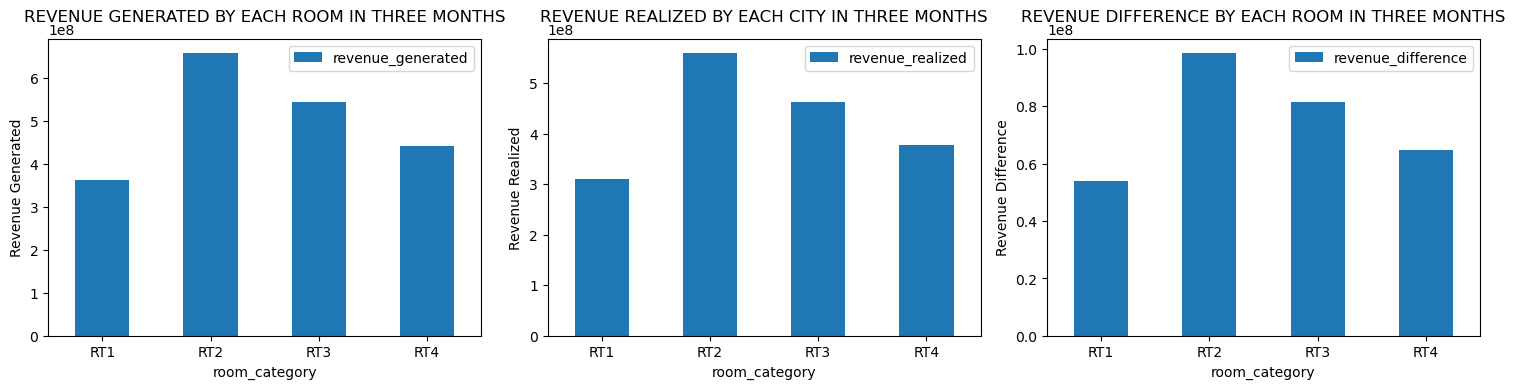

In [49]:
# All three plots in a single figure
room_rev_gen_total = df_2.groupby('room_category')['revenue_generated'].sum().reset_index()
room_rev_real_total = df_2.groupby('room_category')['revenue_realized'].sum().reset_index()
room_rev_dif_total = room_rev_gen_total['revenue_generated'] - room_rev_real_total['revenue_realized']

# Merge the two DataFrames on the 'city' column
merged_df = pd.merge(room_rev_gen_total, room_rev_real_total, on='room_category', suffixes=('_gen', '_real'))

# Create a figure with three subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))

# Plot the first bar chart
merged_df.plot.bar(x='room_category', y='revenue_generated', rot=0, ax=axes[0])
axes[0].set_ylabel('Revenue Generated')
axes[0].set_title('REVENUE GENERATED BY EACH ROOM IN THREE MONTHS',y= 1.03)

# Plot the second bar chart
merged_df.plot.bar(x='room_category', y='revenue_realized', rot=0, ax=axes[1])
axes[1].set_ylabel('Revenue Realized')
axes[1].set_title('REVENUE REALIZED BY EACH CITY IN THREE MONTHS',y= 1.03)

# Plot the third bar chart
merged_df['revenue_difference'] = merged_df['revenue_generated'] - merged_df['revenue_realized']
merged_df.plot.bar(x='room_category', y='revenue_difference', rot=0, ax=axes[2])
axes[2].set_ylabel('Revenue Difference')
axes[2].set_title('REVENUE DIFFERENCE BY EACH ROOM IN THREE MONTHS', y= 1.03)

# Adjust layout
plt.tight_layout()
plt.show()


------------------

-----------------

In [50]:
# REVENUE GENERATED IN EACH MONTH
    # Total revenue
    # Each City
    # Each Property
    # Each Room

In [51]:
## Total Revenune Generated in each month
#df_2 ----> groupby(month)  ----> sum(revenue)

In [52]:
# Add month coumn in df_2

#to_datetime
df_2['check_in_date'] = pd.to_datetime(df_2['check_in_date'])

# Add a 'month' column
df_2['month'] = df_2['check_in_date'].dt.month

In [53]:
df_2.head(3)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,week no,day_type,property_name,category,city,month
0,May012216558RT11,16558,2022-04-27,2022-05-01,2022-05-02,3,RT1,direct online,1.0,Checked Out,10010,10010,W 19,weekend,Atliq Grands,Luxury,Delhi,5
1,May012216558RT12,16558,2022-04-30,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640,W 19,weekend,Atliq Grands,Luxury,Delhi,5
2,May012216558RT13,16558,2022-04-28,2022-05-01,2022-05-04,2,RT1,logtrip,5.0,Checked Out,9100,9100,W 19,weekend,Atliq Grands,Luxury,Delhi,5


In [54]:
df_2['month'].unique()

array([5, 6, 7], dtype=int64)

In [55]:
df_2.tail(3)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,week no,day_type,property_name,category,city,month
134587,Jul312217564RT48,17564,2022-07-30,2022-07-31,2022-08-02,1,RT4,tripster,NaN,Cancelled,32300,12920,W 32,weekend,Atliq Seasons,Business,Mumbai,7
134588,Jul312217564RT49,17564,2022-07-29,2022-07-31,2022-08-01,2,RT4,logtrip,2.0,Checked Out,32300,32300,W 32,weekend,Atliq Seasons,Business,Mumbai,7
134589,Jul312217564RT410,17564,2022-07-31,2022-07-31,2022-08-01,2,RT4,makeyourtrip,NaN,Cancelled,32300,12920,W 32,weekend,Atliq Seasons,Business,Mumbai,7


In [56]:
### Revenue in Each month
month_rev_gen = df_2.groupby('month')['revenue_generated'].sum().reset_index()
month_rev_real = df_2.groupby('month')['revenue_realized'].sum().reset_index()

In [57]:
print(month_rev_gen)
print(month_rev_real)

   month  revenue_generated
0      5          683882555
1      6          651939535
2      7          671724125
   month  revenue_realized
0      5         581930666
1      6         553932355
2      7         572908208


In [58]:
# Check 
df_2[df_2['month'] == 5]['revenue_generated'].sum()

683882555

In [59]:
# merge above two dataframes
month_rev = pd.merge(month_rev_gen, month_rev_real, on='month')
# create a new column for the revenue difference
month_rev['revenue_dif'] = month_rev['revenue_generated'] - month_rev['revenue_realized']

In [60]:
month_rev

,month,revenue_generated,revenue_realized,revenue_dif
0,5,683882555,581930666,101951889
1,6,651939535,553932355,98007180
2,7,671724125,572908208,98815917


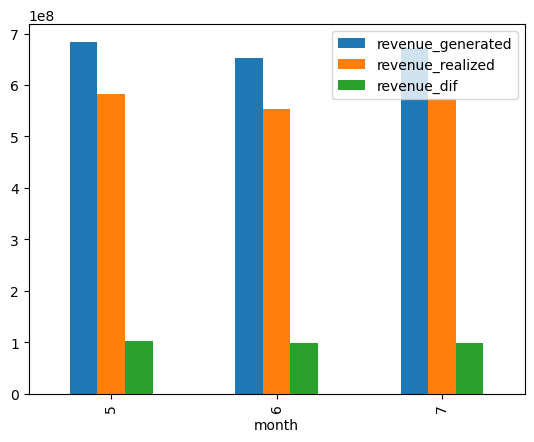

In [61]:
month_rev.plot(kind = 'bar', x= 'month')
plt.show()

In [62]:
# let us analyse how much percentage of genrated revenue is actually realized
month_rev['rev_real vs rev_gen in percentage'] =  (month_rev['revenue_realized']/month_rev['revenue_generated'])*100

In [63]:
month_rev

,month,revenue_generated,revenue_realized,revenue_dif,rev_real vs rev_gen in percentage
0,5,683882555,581930666,101951889,85.092193
1,6,651939535,553932355,98007180,84.966830
2,7,671724125,572908208,98815917,85.289211


In [64]:
# Revenue From Different Cities In Each Month

In [65]:
# revenue by each property in each month.
# df_2  ----> groupby(city,month)  ----> sum (revenue)

In [66]:
month_city = df_2.groupby(['city','month'])['revenue_generated'].sum().reset_index()
month_city

,city,month,revenue_generated
0,Bangalore,5,168977025
1,Bangalore,6,160318575
2,Bangalore,7,165532575
3,Delhi,5,117489750
4,Delhi,6,113082900
5,Delhi,7,115879190
6,Hyderabad,5,130674050
7,Hyderabad,6,123285950
8,Hyderabad,7,127440850
9,Mumbai,5,266741730


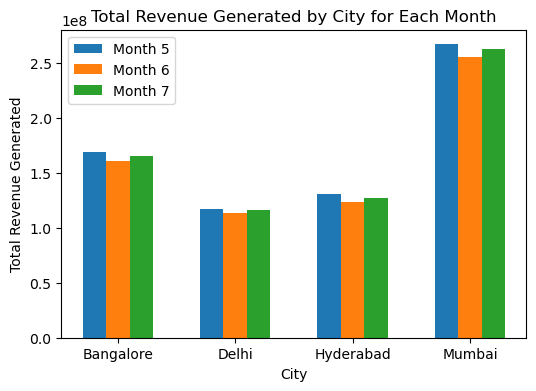

In [67]:
# Pivot the DataFrame to have 'month' values as columns
prop_pivoted = month_city.pivot(index='city', columns='month', values='revenue_generated').reset_index()

# Plotting the grouped bar graph
plt.figure(figsize=(6, 4))

bar_width = 0.2
bar_positions = np.arange(len(prop_pivoted['city']))

plt.bar(bar_positions - bar_width, prop_pivoted[5], width=bar_width, label='Month 5')
plt.bar(bar_positions, prop_pivoted[6], width=bar_width, label='Month 6')
plt.bar(bar_positions + bar_width, prop_pivoted[7], width=bar_width, label='Month 7')

plt.xlabel('City')
plt.ylabel('Total Revenue Generated')
plt.title('Total Revenue Generated by City for Each Month')
plt.xticks(bar_positions, prop_pivoted['city'])
plt.legend()


plt.show()

In [68]:
# revenue by each property in each month.
# df_2  ----> groupby(month, property)  ----> sum (revenue)

In [69]:
month_prop = df_2.groupby(['property_id','month'])['revenue_generated'].sum().reset_index()
month_prop

,property_id,month,revenue_generated
0,16558,5,14290290
1,16558,6,13763260
2,16558,7,14198170
3,16559,5,46730450
4,16559,6,45416690
...,...,...,...
70,19562,6,31087350
71,19562,7,32541450
72,19563,5,27488475
73,19563,6,26471850


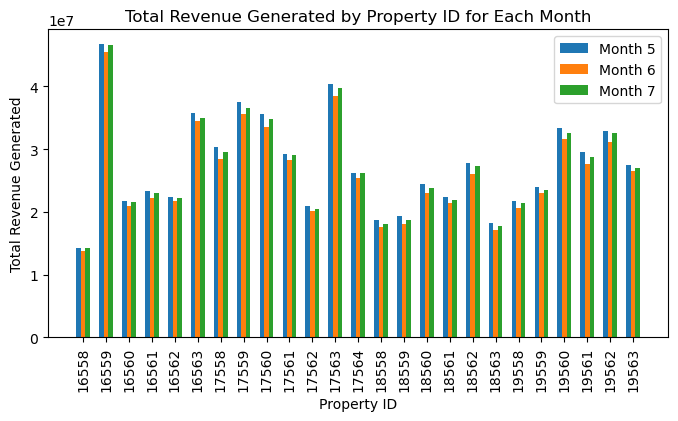

In [70]:
# Pivot the DataFrame to have 'month' values as columns
prop_pivoted = month_prop.pivot(index='property_id', columns='month', values='revenue_generated').reset_index()

# Plotting the grouped bar graph
plt.figure(figsize=(8, 4))

bar_width = 0.2
bar_positions = np.arange(len(prop_pivoted['property_id']))

plt.bar(bar_positions - bar_width, prop_pivoted[5], width=bar_width, label='Month 5')
plt.bar(bar_positions, prop_pivoted[6], width=bar_width, label='Month 6')
plt.bar(bar_positions + bar_width, prop_pivoted[7], width=bar_width, label='Month 7')

plt.xlabel('Property ID')
plt.ylabel('Total Revenue Generated')
plt.title('Total Revenue Generated by Property ID for Each Month')
plt.xticks(bar_positions, prop_pivoted['property_id'])
plt.legend()

plt.xticks(rotation='vertical')

plt.show()

In [71]:
# Revenue From Different Room In Each Month

In [72]:
# revenue by each property in each month.
# df_2  ----> groupby(Room,month)  ----> sum (revenue)

In [73]:
month_room = df_2.groupby(['room_category','month'])['revenue_generated'].sum().reset_index()
month_room

,room_category,month,revenue_generated
0,RT1,5,123767995
1,RT1,6,118190605
2,RT1,7,121586595
3,RT2,5,224799390
4,RT2,6,213991920
5,RT2,7,220154850
6,RT3,5,184975200
7,RT3,6,176264640
8,RT3,7,182358000
9,RT4,5,150339970


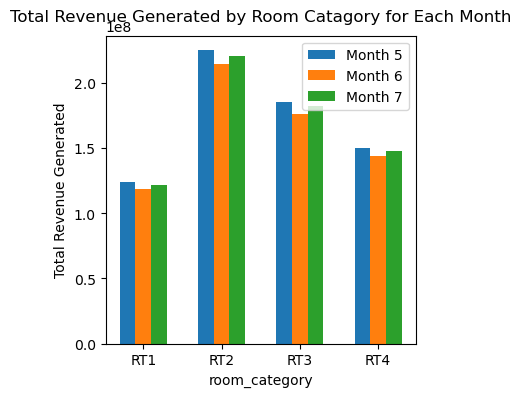

In [74]:
# Pivot the DataFrame to have 'month' values as columns
prop_pivoted = month_room.pivot(index='room_category', columns='month', values='revenue_generated').reset_index()

# Plotting the grouped bar graph
plt.figure(figsize=(4,4))

bar_width = 0.2
bar_positions = np.arange(len(prop_pivoted['room_category']))

plt.bar(bar_positions - bar_width, prop_pivoted[5], width=bar_width, label='Month 5')
plt.bar(bar_positions, prop_pivoted[6], width=bar_width, label='Month 6')
plt.bar(bar_positions + bar_width, prop_pivoted[7], width=bar_width, label='Month 7')

plt.xlabel('room_category')
plt.ylabel('Total Revenue Generated')
plt.title('Total Revenue Generated by Room Catagory for Each Month',y=1.02)
plt.xticks(bar_positions, prop_pivoted['room_category'])
plt.legend()

plt.show()